<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/02_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras import backend as K
import numpy as np
from sklearn.datasets import make_moons
from tensorflow.keras.utils import plot_model

Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=2),
                             tf.keras.layers.Dense(6,  activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________

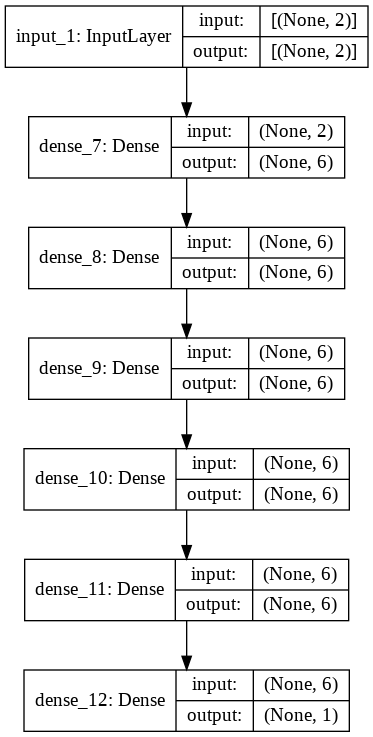

In [ ]:
plot_model(model, show_shapes=True)

Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

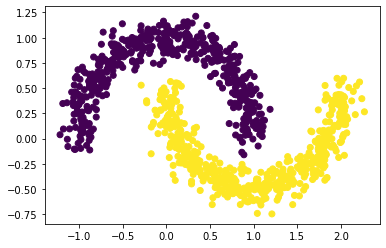

In [ ]:
#Visualise Data
plt.scatter(X[:,0], X[:,1], c=y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Create Model
tf.random.set_seed(42)
K.clear_session() 

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(8, input_shape = (2,), activation='relu'),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'], loss = tf.keras.losses.BinaryCrossentropy())

In [ ]:
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.7258 - accuracy: 0.2663 - val_loss: 0.7007 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.4825 - val_loss: 0.6658 - val_accuracy: 0.6100
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.7163 - val_loss: 0.6402 - val_accuracy: 0.7250
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7613 - val_loss: 0.6169 - val_accuracy: 0.7350
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7800 - val_loss: 0.5912 - val_accuracy: 0.7500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7925 - val_loss: 0.5619 - val_accuracy: 0.7500
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7975 - val_loss: 0.5300 - val_accuracy: 0.7500
Epoch 8/100
2

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9950


[0.03785621002316475, 0.9950000047683716]

Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

S(y)i = (e**y)/sum(e**y)

In [ ]:
#my code
import math 
inputs = [1,2,4,6,-1,10]
def softmax(inputs):
  delimiter = 0
  outputs = []
  for input in inputs:
    delimiter = delimiter + math.exp(input)
  for input in inputs:
    outputs.append(math.exp(input)/delimiter)
  return outputs  

In [ ]:
softmax(inputs)

[0.00012083955104146391,
 0.00032847595575516067,
 0.002427127264224744,
 0.01793417951460071,
 1.6353854866381636e-05,
 0.9791730238595115]

In [ ]:
#From article
def softmax_(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

In [ ]:
softmax_(inputs)

array([1.20839551e-04, 3.28475956e-04, 2.42712726e-03, 1.79341795e-02,
       1.63538549e-05, 9.79173024e-01])